<a href="https://colab.research.google.com/github/datascience-vivek/Outliers_Feature_Engineering/blob/main/Copy_of_Outliers_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Creating a random distribution of numbers:
def create_numbers(mu= 54, sigma= 15, num_samples= 100, seed = 42):##creating normal distribution
  np.random.seed(seed)

  sample_numbers = np.random.normal(loc=mu,scale=sigma, size=num_samples)
  sample_numbers = np.round(sample_numbers, decimals=0)
  return sample_numbers

In [3]:
sample = create_numbers()
print(sample)


[61. 52. 64. 77. 50. 50. 78. 66. 47. 62. 47. 47. 58. 25. 28. 46. 39. 59.
 40. 33. 76. 51. 55. 33. 46. 56. 37. 60. 45. 50. 45. 82. 54. 38. 66. 36.
 57. 25. 34. 57. 65. 57. 52. 49. 32. 43. 47. 70. 59. 28. 59. 48. 44. 63.
 69. 68. 41. 49. 59. 69. 47. 51. 37. 36. 66. 74. 53. 69. 59. 44. 59. 77.
 53. 77. 15. 66. 55. 50. 55. 24. 51. 59. 76. 46. 42. 46. 68. 59. 46. 62.
 55. 69. 43. 49. 48. 32. 58. 58. 54. 50.]


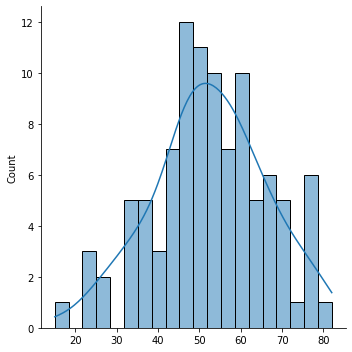

In [4]:
sns.displot(sample, bins = 20, kde= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


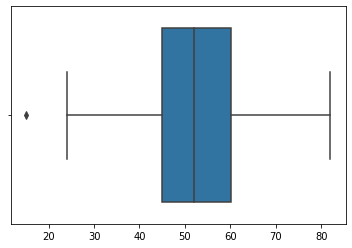

In [5]:
sns.boxplot(sample)

In [6]:
ser = pd.Series(sample)
ser

0     61.0
1     52.0
2     64.0
3     77.0
4     50.0
      ... 
95    32.0
96    58.0
97    58.0
98    54.0
99    50.0
Length: 100, dtype: float64

In [7]:
ser.describe()

count    100.000000
mean      52.410000
std       13.610079
min       15.000000
25%       45.000000
50%       52.000000
75%       60.250000
max       82.000000
dtype: float64

In [8]:
IQR = 60.25-45.0

lower_limit = 45 - (1.5*IQR)
lower_limit

22.125

In [9]:
upper_limit = 60.25+(1.5*IQR)
upper_limit

83.125

In [10]:
ser[ser> lower_limit]

0     61.0
1     52.0
2     64.0
3     77.0
4     50.0
      ... 
95    32.0
96    58.0
97    58.0
98    54.0
99    50.0
Length: 99, dtype: float64

In [11]:
Q75, Q25 = np.percentile(sample, [75,25])
iqr = Q75-Q25
iqr

15.25

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/ames.csv', index_col=[0])

In [14]:
df.head()

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [15]:
df.corr()['SalePrice'].sort_values()

PID               -0.246597
Enclosed.Porch    -0.128819
Kitchen.AbvGr     -0.119830
Overall.Cond      -0.101741
MS.SubClass       -0.085088
Low.Qual.Fin.SF   -0.037666
Bsmt.Half.Bath    -0.035995
Yr.Sold           -0.030541
Misc.Val          -0.019311
BsmtFin.SF.2       0.005874
X3Ssn.Porch        0.032219
Mo.Sold            0.035092
Pool.Area          0.071844
Screen.Porch       0.112140
Bedroom.AbvGr      0.143969
Bsmt.Unf.SF        0.182874
X2nd.Flr.SF        0.269954
Lot.Area           0.270518
Bsmt.Full.Bath     0.276821
Half.Bath          0.285355
Open.Porch.SF      0.317649
Wood.Deck.SF       0.327985
Lot.Frontage       0.367561
BsmtFin.SF.1       0.450028
Fireplaces         0.476386
TotRms.AbvGrd      0.500005
Mas.Vnr.Area       0.514516
Garage.Yr.Blt      0.527500
Year.Remod.Add     0.533411
Full.Bath          0.546369
Year.Built         0.558918
Garage.Area        0.644372
X1st.Flr.SF        0.645589
Garage.Cars        0.648457
Total.Bsmt.SF      0.660607
Gr.Liv.Area        0

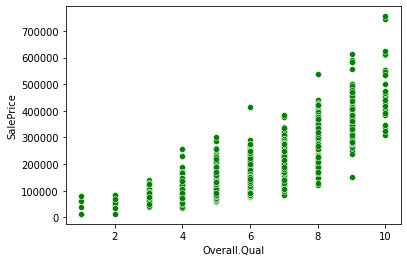

In [16]:
## Highly correlated
sns.scatterplot(x= 'Overall.Qual', y= 'SalePrice', data=df, color= 'green')

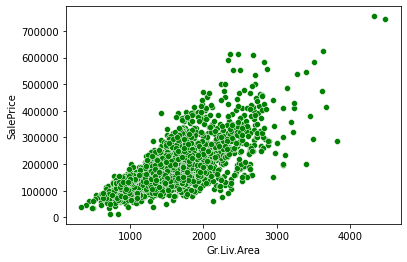

In [17]:
## Highly correlated
sns.scatterplot(x= 'Gr.Liv.Area', y= 'SalePrice', data=df, color= 'green')

In [18]:
df[(df['Overall.Qual']>8) & (df['SalePrice']<200000)]

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000


In [19]:
df[(df['Gr.Liv.Area']>4000) & (df['SalePrice']<400000)]

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,


In [20]:
##Storing index value in the drop ind
drop_ind = df[(df['Gr.Liv.Area']>4000) & (df['SalePrice']<400000)].index

In [21]:
df = df.drop(drop_ind, axis = 0)

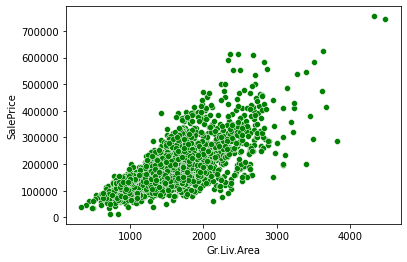

In [22]:
## Outliers dropped
sns.scatterplot(x= 'Gr.Liv.Area', y= 'SalePrice', data=df, color= 'green')

In [23]:
df.to_csv('/content/drive/MyDrive/Datasets/ames_clear_outliers.csv')

In [24]:
df = pd.read_csv(r'/content/drive/MyDrive/Datasets/ames_clear_outliers.csv', index_col=[0])

In [25]:
df.head()

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [26]:
df = df.drop("PID", axis = 1)

In [27]:
len(df.columns)

80

In [28]:
df.isnull().sum()

MS.SubClass         0
MS.Zoning           0
Lot.Frontage      490
Lot.Area            0
Street              0
                 ... 
Mo.Sold             0
Yr.Sold             0
Sale.Type           0
Sale.Condition      0
SalePrice           0
Length: 80, dtype: int64

In [29]:
(df.isnull().sum()/len(df))*100

MS.SubClass        0.00000
MS.Zoning          0.00000
Lot.Frontage      16.74069
Lot.Area           0.00000
Street             0.00000
                    ...   
Mo.Sold            0.00000
Yr.Sold            0.00000
Sale.Type          0.00000
Sale.Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [30]:
def percen_missing(df):
  percent_nan = (df.isnull().sum()/len(df))*100
  percent_nan = percent_nan[percent_nan>0].sort_values()##percentage missing is more than 0%
  return percent_nan 

In [31]:
percent_nan = percen_missing(df)
percent_nan

Electrical         0.034165
Garage.Area        0.034165
Total.Bsmt.SF      0.034165
Bsmt.Unf.SF        0.034165
BsmtFin.SF.1       0.034165
BsmtFin.SF.2       0.034165
Garage.Cars        0.034165
Bsmt.Full.Bath     0.068329
Bsmt.Half.Bath     0.068329
Mas.Vnr.Area       0.785787
Mas.Vnr.Type       0.785787
BsmtFin.Type.1     2.733174
Bsmt.Qual          2.733174
Bsmt.Cond          2.733174
BsmtFin.Type.2     2.767339
Bsmt.Exposure      2.835668
Garage.Type        5.363854
Garage.Finish      5.432183
Garage.Qual        5.432183
Garage.Cond        5.432183
Garage.Yr.Blt      5.432183
Lot.Frontage      16.740690
Fireplace.Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc.Feature      96.412709
Pool.QC           99.590024
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

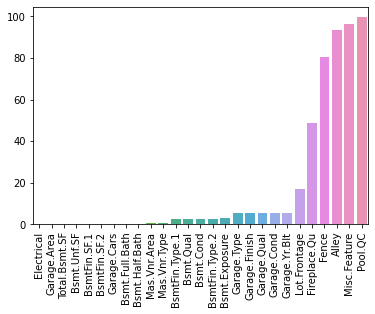

In [32]:

sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation = 90)

(0.0, 1.0)

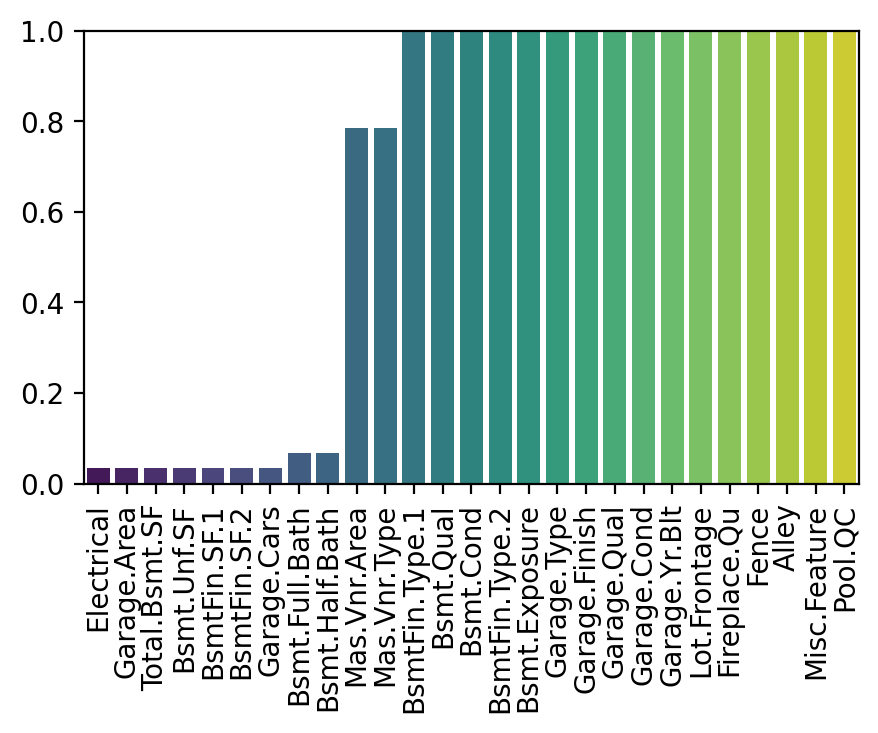

In [33]:
plt.figure(figsize=(5,3), dpi = 200)
sns.barplot(x=percent_nan.index, y=percent_nan, palette = 'viridis')
plt.xticks(rotation = 90)
plt.ylim(0,1)## For visualize 1% data 

In [34]:
percent_nan[percent_nan>1] ##dropped percent values less than 1%

BsmtFin.Type.1     2.733174
Bsmt.Qual          2.733174
Bsmt.Cond          2.733174
BsmtFin.Type.2     2.767339
Bsmt.Exposure      2.835668
Garage.Type        5.363854
Garage.Finish      5.432183
Garage.Qual        5.432183
Garage.Cond        5.432183
Garage.Yr.Blt      5.432183
Lot.Frontage      16.740690
Fireplace.Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc.Feature      96.412709
Pool.QC           99.590024
dtype: float64

In [35]:
df= df.dropna(axis= 0, subset=['Electrical','Garage.Cars'])

In [36]:
percent_nan = percen_missing(df)

(0.0, 1.0)

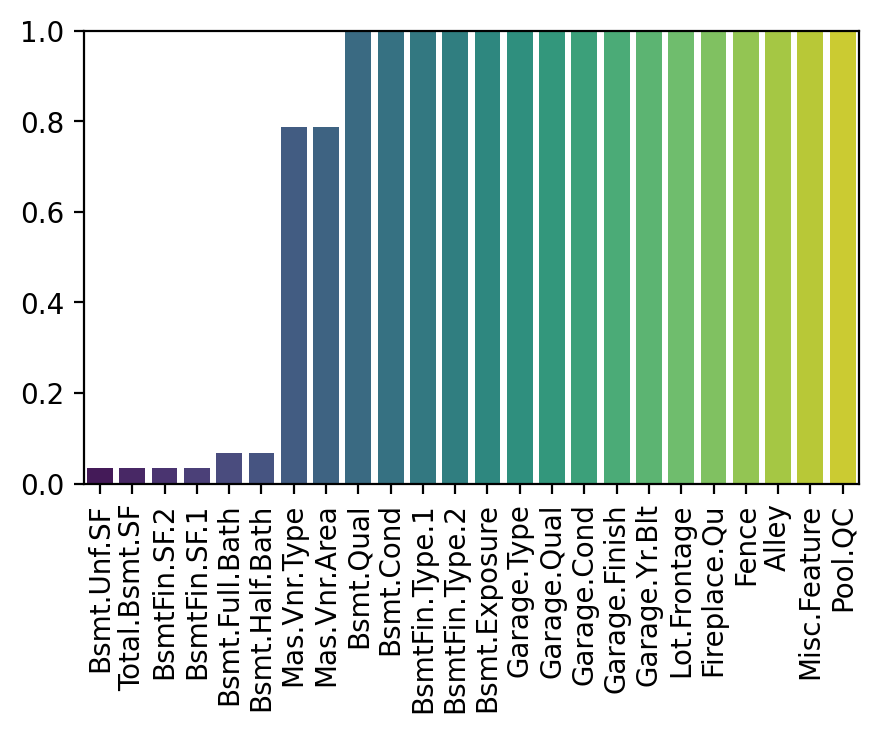

In [37]:
plt.figure(figsize=(5,3), dpi = 200)
sns.barplot(x=percent_nan.index, y=percent_nan, palette = 'viridis')
plt.xticks(rotation = 90)
plt.ylim(0,1)## For visualize 1% data 

In [38]:
df[df['Bsmt.Half.Bath'].isnull()]

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [39]:
#BSMT Numeric Columns--- Fillna'0"
bsmt_num_cols = ['Total.Bsmt.SF','Bsmt.Unf.SF','BsmtFin.SF.1','BsmtFin.SF.2','Garage.Cars','Bsmt.Full.Bath','Bsmt.Half.Bath']
df[bsmt_num_cols]= df[bsmt_num_cols].fillna(0)

In [40]:
## Bsmt categorical columns - fillna'None'
bsmt_str_cols = ['BsmtFin.Type.1','Bsmt.Qual','Bsmt.Cond','BsmtFin.Type.2','Bsmt.Exposure']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [41]:
df[df['Bsmt.Full.Bath'].isnull()]

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,


In [42]:
percent_nan = percen_missing(df)

(0.0, 1.0)

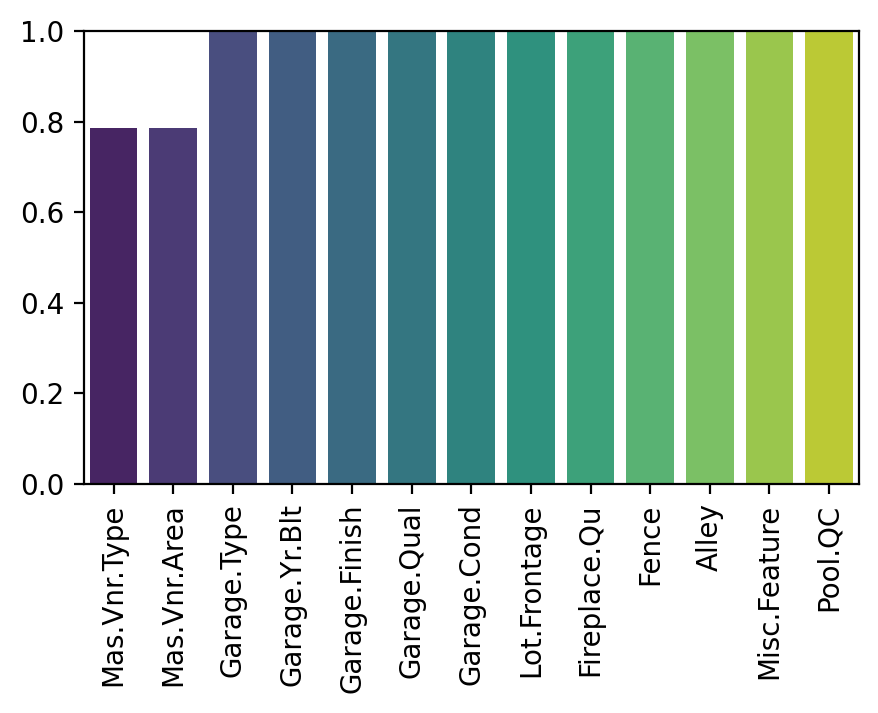

In [43]:
plt.figure(figsize=(5,3), dpi = 200)
sns.barplot(x=percent_nan.index, y=percent_nan, palette = 'viridis')
plt.xticks(rotation = 90)
plt.ylim(0,1)## For visualize 1% data 


In [45]:
df['Mas.Vnr.Type']= df['Mas.Vnr.Type'].fillna('None')##Categorical Feature

In [46]:
df['Mas.Vnr.Area'] = df['Mas.Vnr.Area'].fillna('0')##Numerical Feature

In [48]:
percent_nan = percen_missing(df)

(0.0, 1.0)

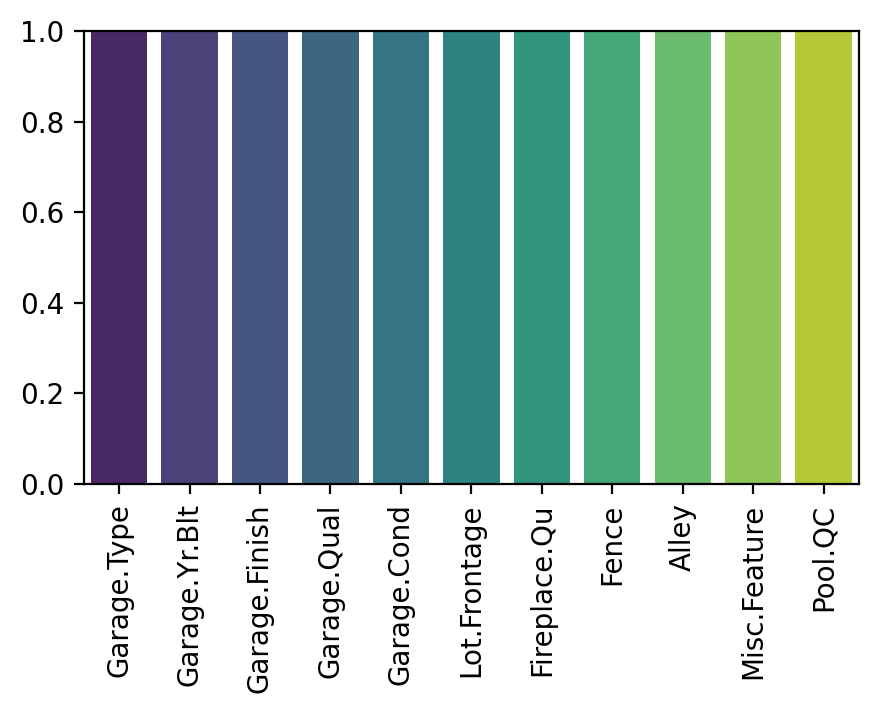

In [49]:
plt.figure(figsize=(5,3), dpi = 200)
sns.barplot(x=percent_nan.index, y=percent_nan, palette = 'viridis')
plt.xticks(rotation = 90)
plt.ylim(0,1)## For visualize 1% data 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

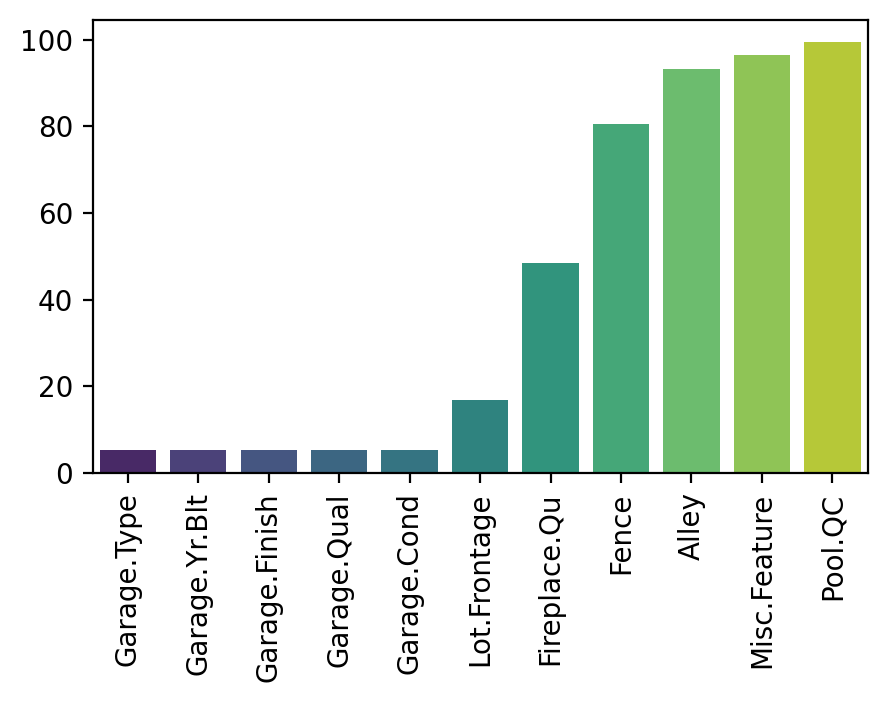

In [50]:
plt.figure(figsize=(5,3), dpi = 200)
sns.barplot(x=percent_nan.index, y=percent_nan, palette = 'viridis')
plt.xticks(rotation = 90)
 


In [51]:
gar_str_cols = ['Garage.Type','Garage.Finish','Garage.Qual','Garage.Cond']
df[gar_str_cols]= df[gar_str_cols].fillna('None')


In [52]:
percent_nan = percen_missing(df)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

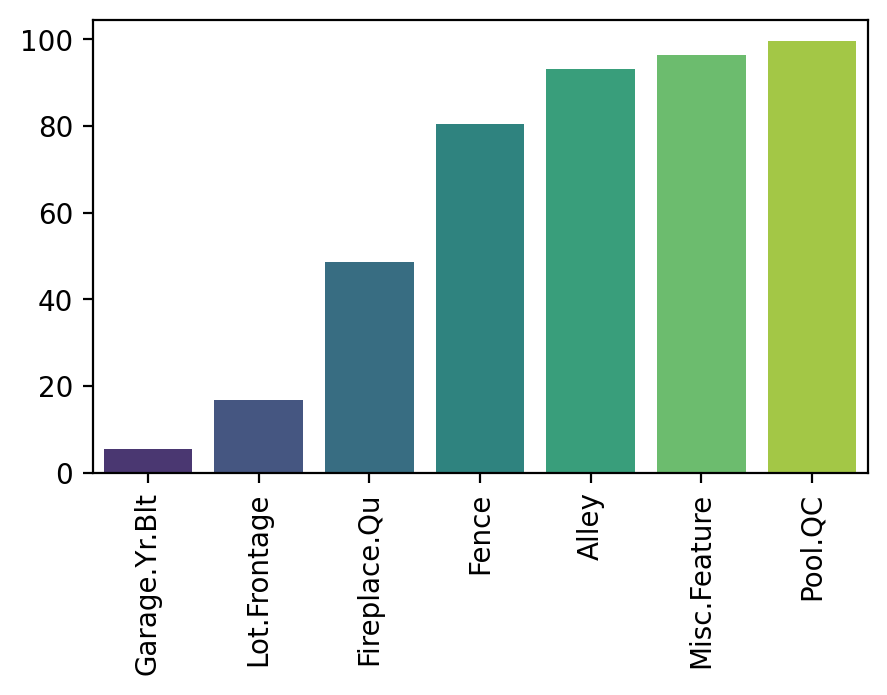

In [53]:
plt.figure(figsize=(5,3), dpi = 200)
sns.barplot(x=percent_nan.index, y=percent_nan, palette = 'viridis')
plt.xticks(rotation = 90)
 


In [59]:
df['Garage.Yr.Blt'] = df['Garage.Yr.Blt'].fillna(0)



In [60]:
df = df.drop(['Pool.QC', 'Fence','Alley', 'Misc.Feature'], axis = 1)

In [61]:
percent_nan = percen_missing(df)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

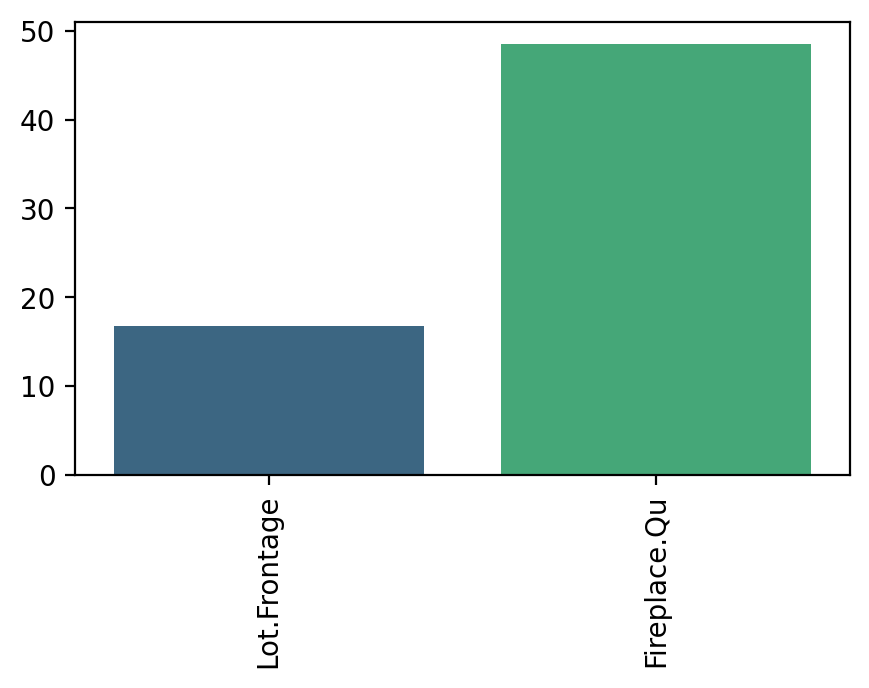

In [62]:
plt.figure(figsize=(5,3), dpi = 200)
sns.barplot(x=percent_nan.index, y=percent_nan, palette = 'viridis')
plt.xticks(rotation = 90)
 


In [63]:
df['Fireplace.Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace.Qu, dtype: int64

In [64]:
df['Fireplace.Qu']= df['Fireplace.Qu'].fillna('None')

In [65]:
percent_nan = percen_missing(df)

(array([0]), <a list of 1 Text major ticklabel objects>)

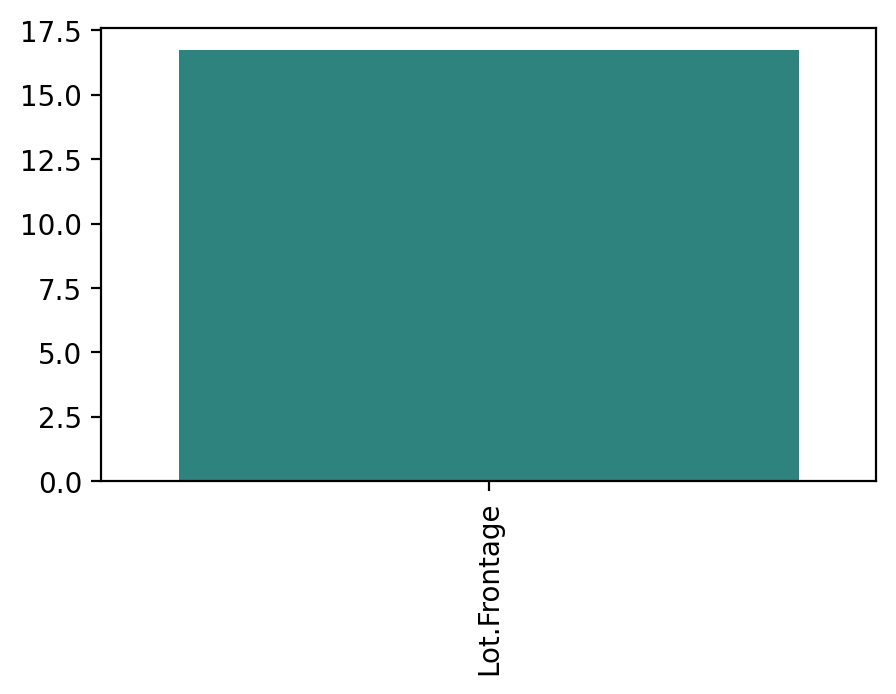

In [66]:
plt.figure(figsize=(5,3), dpi = 200)
sns.barplot(x=percent_nan.index, y=percent_nan, palette = 'viridis')
plt.xticks(rotation = 90)
 


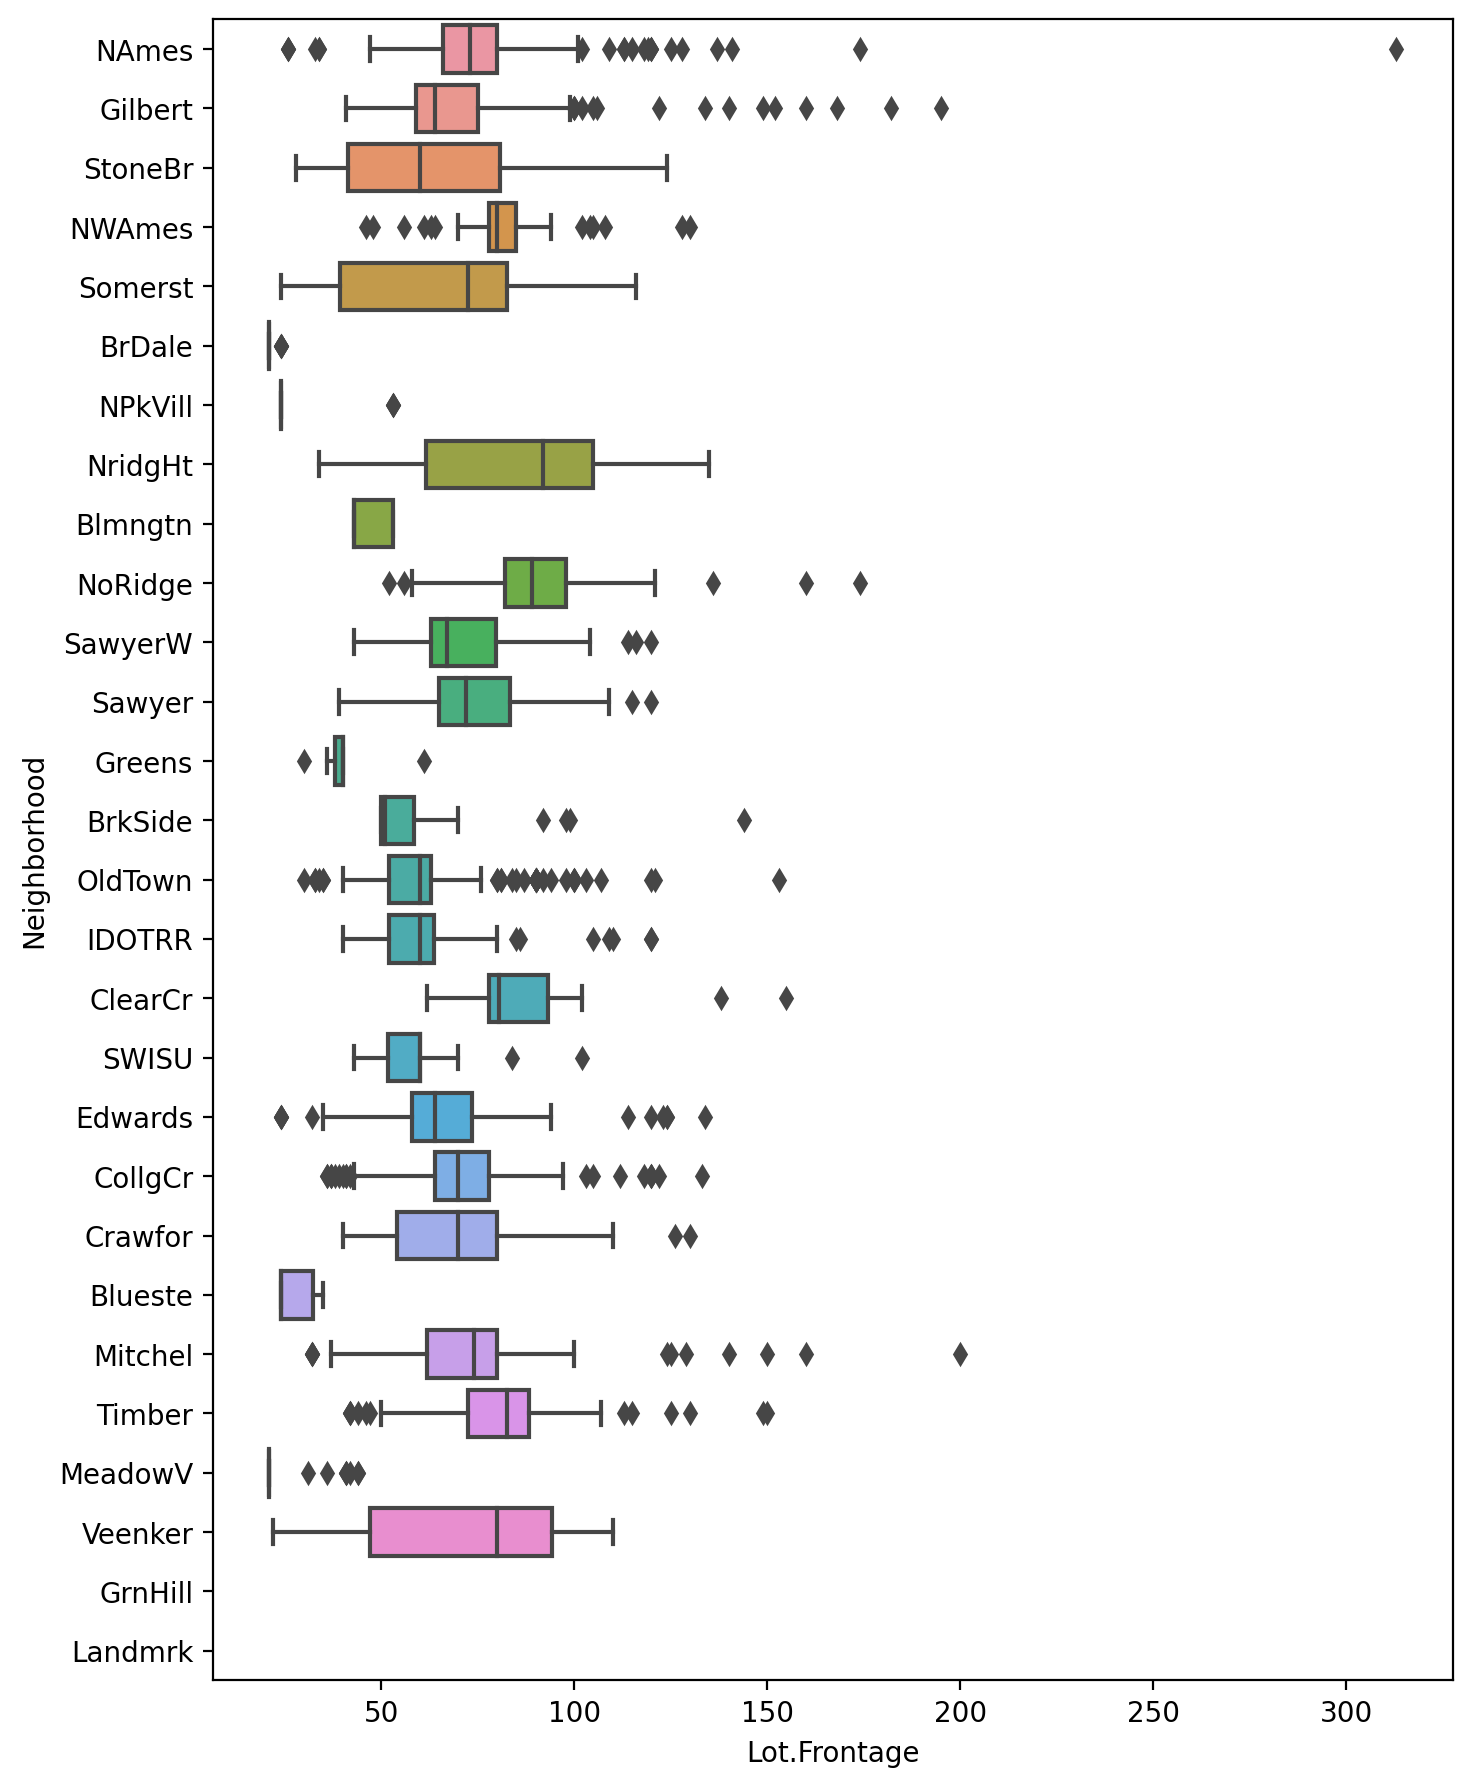

In [69]:
plt.figure(figsize=(8,11), dpi = 200)
sns.boxplot(x= 'Lot.Frontage', y ='Neighborhood', data = df)

In [70]:
df.groupby('Neighborhood')['Lot.Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot.Frontage, dtype: float64

In [74]:
df['Lot.Frontage']= df.groupby('Neighborhood')['Lot.Frontage'].transform(lambda value: value.fillna(value.mean()))

In [75]:
df.isnull().sum()

MS.SubClass       0
MS.Zoning         0
Lot.Frontage      3
Lot.Area          0
Street            0
                 ..
Mo.Sold           0
Yr.Sold           0
Sale.Type         0
Sale.Condition    0
SalePrice         0
Length: 76, dtype: int64

In [76]:
percent_nan = percen_missing(df)

(array([0]), <a list of 1 Text major ticklabel objects>)

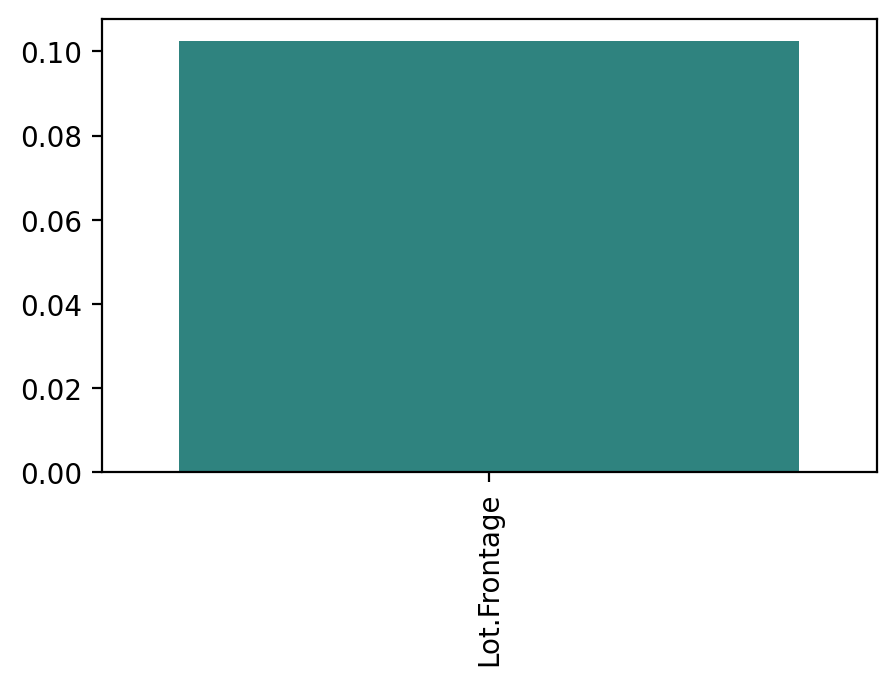

In [77]:
plt.figure(figsize=(5,3), dpi = 200)
sns.barplot(x=percent_nan.index, y=percent_nan, palette = 'viridis')
plt.xticks(rotation = 90)
 


In [78]:
df['Lot.Frontage'] = df['Lot.Frontage'].fillna(0)